###  END SEMESTER ASSESSMENT (ESA)
## MBA

### Linear Predictive models



### Problem Statement:
<u>**Objective** </u>

What determines the salary and the jobs that engineers are offered right after graduation? Various factors such as college grades, candidate skills, the proximity of the college to industrial hubs and market conditions for specific industries determine this. On the basis of these various factors, your objective is to determine the salary of an engineering graduate in India.

#### Data Description
- ID: A unique ID to identify a candidate
- Salary: Annual CTC offered to the candidate (in INR)
- Gender: Candidate's gender
- 10percentage: Overall marks obtained in grade 10 examinations
- 12percentage: Overall marks obtained in grade 12 examinations
- CollegeTier: Each college has been annotated as 1 or 2. The annotations have been computed from the average AMCAT scores obtained by the students in the college/university. Colleges with an average score above a threshold are tagged as 1 and others as 2.
- CollegeGPA: Aggregate GPA at graduation
- CollegeCityTier: The tier of the city in which the college is located in. This is annotated based on the population of the cities.
- GraduationYear: Year of graduation (Bachelor's degree)
- Logical: Score in AMCAT Logical ability section
- Quant: Score in AMCAT's Quantitative ability section
- Domain: Scores in AMCAT's domain module
- agreeableness: Scores in one of the sections of AMCAT's personality test
- openesstoexperience: Scores in one of the sections of AMCAT's personality test         


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt

#import functions to perform feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import functions to perform cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV

## Section B (50 marks)

#### 2a Read the dataset and perform the following (10 marks)
i)Read the file and identify the categorical and numerical variable (2 mark)

ii)Identify the missing values and see for any patterns using heatmap    (3 marks)

iii)Implement a strategy to deal with the missing values.(2 marks)

iv) Encode the categorical variables   (3 marks)
     
     




In [2]:
# i) Read the dataset.

In [3]:
df = pd.read_csv('./Dataset/Engineering_graduate_salary.csv')

In [4]:
df.head()

,ID,Gender,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,Logical,Quant,Domain,agreeableness,openess_to_experience,Salary
0,604399,f,87.80,2009,84.00,6920,1,73.82,6920,1,2013.0,665,810,0.694479,0.3789,0.2889,445000
1,988334,m,57.00,2010,64.50,6624,2,65.00,6624,0,2014.0,435,210,0.342315,0.0459,-0.2859,110000
2,301647,m,77.33,2007,85.17,9084,2,61.94,9084,0,2011.0,475,505,0.824666,-0.1232,-0.2875,255000
3,582313,m,84.30,2009,86.00,8195,1,80.40,8195,1,2013.0,620,635,0.990009,0.2124,0.4805,420000
4,339001,f,82.00,2008,75.00,4889,2,NaN,4889,1,2012.0,495,365,0.278457,-0.7473,0.1864,200000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2998 non-null   int64  
 1   Gender                 2998 non-null   object 
 2   10percentage           2996 non-null   float64
 3   12graduation           2998 non-null   int64  
 4   12percentage           2994 non-null   float64
 5   CollegeID              2998 non-null   int64  
 6   CollegeTier            2998 non-null   int64  
 7   collegeGPA             2995 non-null   float64
 8   CollegeCityID          2998 non-null   int64  
 9   CollegeCityTier        2998 non-null   int64  
 10  GraduationYear         2997 non-null   float64
 11  Logical                2998 non-null   int64  
 12  Quant                  2998 non-null   int64  
 13  Domain                 2998 non-null   float64
 14  agreeableness          2998 non-null   float64
 15  open

In [6]:
#ii) identify the categorical and numerical variable


In [7]:
df.dtypes

ID                         int64
Gender                    object
10percentage             float64
12graduation               int64
12percentage             float64
CollegeID                  int64
CollegeTier                int64
collegeGPA               float64
CollegeCityID              int64
CollegeCityTier            int64
GraduationYear           float64
Logical                    int64
Quant                      int64
Domain                   float64
agreeableness            float64
openess_to_experience    float64
Salary                     int64
dtype: object

In [8]:
#iii) Identify the missing values and see for any patterns using heatmap

In [9]:
df.isnull().sum()

ID                       0
Gender                   0
10percentage             2
12graduation             0
12percentage             4
CollegeID                0
CollegeTier              0
collegeGPA               3
CollegeCityID            0
CollegeCityTier          0
GraduationYear           1
Logical                  0
Quant                    0
Domain                   0
agreeableness            0
openess_to_experience    0
Salary                   0
dtype: int64

<Axes: >

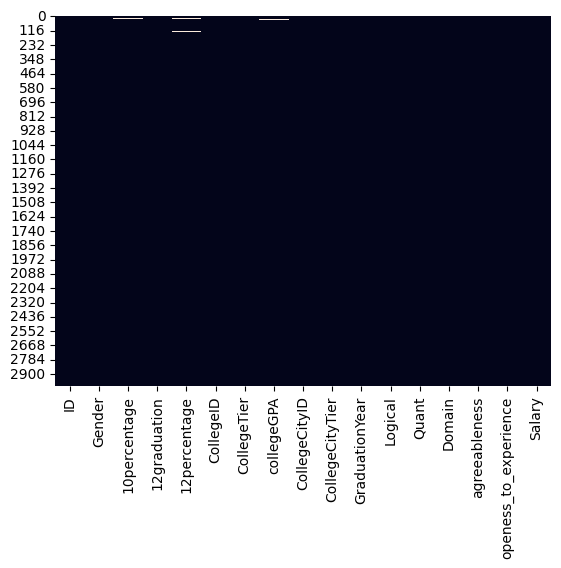

In [10]:
sns.heatmap(df.isnull(), cbar=False)

#### Observations:
##### The variables 10percentage,12percentage, collegeGPA, GraduationYear have missing values.
##### Variable GraduationYear is a Categorical Variable with Numerical Values. 
##### Therefore using Mean and Median to impute the missing value would not be appropriate.

In [11]:
#iv) Implement a strategy to deal with the missing values.


### Strategy:
###### 1) Visualize the variable via BoxPlot for outliers:
##### 2) Use Mean/Median (for data with outliers) for imputing missing values of Numerical Varibales.
##### 3) Use Mode or imputing missing values of Categorical Varibales.

### Visualizing the data via Boxplot

Text(0.5, 1.0, 'Boxplot for variable 10percentage')

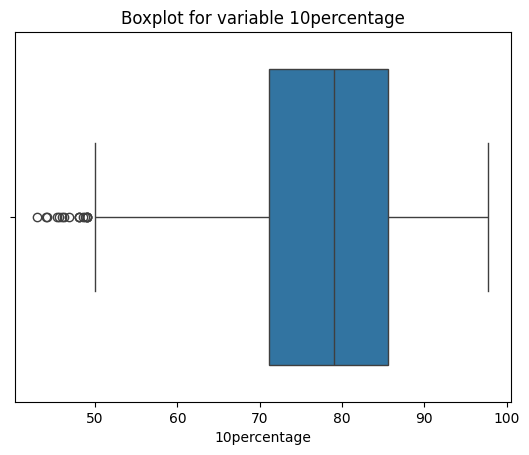

In [12]:
sns.boxplot(df['10percentage'], orient='h')
plt.title('Boxplot for variable 10percentage')

In [13]:
# Imputing the Missing Values for Variable 10percentage (Numerical)
# As the above boxplot contains outliers, will impute missing value via median
df['10percentage'] = df['10percentage'].fillna(df['10percentage'].median())

Text(0.5, 1.0, 'Boxplot for variable 12percentage')

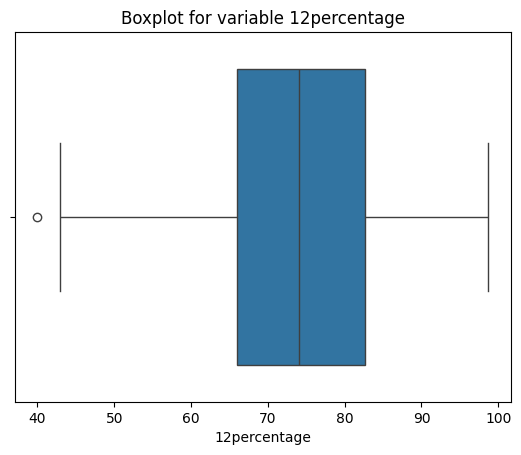

In [14]:
sns.boxplot(df['12percentage'], orient='h')
plt.title('Boxplot for variable 12percentage')

In [15]:
# Imputing the Missing Values for Variable 12percentage (Numerical)
# As the above boxplot does not contains outliers, will impute missing value via median
df['12percentage'] = df['12percentage'].fillna(df['12percentage'].mean())

Text(0.5, 1.0, 'Boxplot for variable collegeGPA')

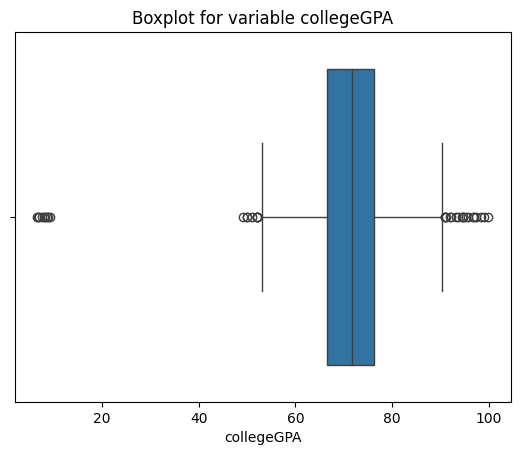

In [16]:
sns.boxplot(df['collegeGPA'], orient='h')
plt.title('Boxplot for variable collegeGPA')

In [17]:
# Imputing the Missing Values for Variable collegeGPA (Numerical)
# As the above boxplot does not contains outliers, will impute missing value via median
df['collegeGPA'] = df['collegeGPA'].fillna(df['collegeGPA'].median())

In [18]:
# Imputing the Missing Values for Variable GraduationYear (Categorical)
df['GraduationYear'] = df['GraduationYear'].fillna(df['GraduationYear'].mode().iloc[0])

In [19]:
# Verifying the missing value treatment
df.isnull().sum()

ID                       0
Gender                   0
10percentage             0
12graduation             0
12percentage             0
CollegeID                0
CollegeTier              0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
GraduationYear           0
Logical                  0
Quant                    0
Domain                   0
agreeableness            0
openess_to_experience    0
Salary                   0
dtype: int64

In [20]:
#v) Encode the categorical variables


In [21]:
# Segregating the Numerical and Categorical Variables
df_num = df.select_dtypes(include =['int64','float64'])
df_cat = df.select_dtypes(include ='object')

# N-1 Encoding 
dummy_var = pd.get_dummies(df_cat, drop_first=True)
dummy_var.head()

,Gender_m
0,False
1,True
2,True
3,True
4,False


In [22]:
# Converting the Gender_m from Categorical to Numerical
dummy_var = dummy_var.astype(int)

### 2b)
 I. Create the train and test data set with suitable y and x variables – 4marks

 II. Develop a linear regression model based on the variables – 6 marks

 III. Based on the output identify which variables are significant and which are insignificant (use   
      alpha =.05)– 6 marks
      
IV. Check for correlation among the numeric variables, based on the correlation accordingly decide which variables to be included, use correlation of .5 as cutoff.  4 - marks

V. Based on the variables accordingly remove insignificant variables and reconduct analysis - 6 marks

VI. Conclude accordingly using the output and provide which variables would affect the regression
model – 4 marks

In [23]:
#i) Create the train and test data set with suitable y and x variables – 4marks


In [24]:
y = df_num['Salary']

df_num = df_num.drop('Salary', axis=1)

X = pd.concat([df_num,dummy_var], axis=1)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=2)

In [26]:
# ii) Develop a linear regression model based on the variables


In [27]:
X_train = sm.add_constant(X_train)

model = sm.OLS(y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     27.77
Date:                Sat, 30 Nov 2024   Prob (F-statistic):           7.13e-72
Time:                        19:56:45   Log-Likelihood:                -28500.
No. Observations:                2098   AIC:                         5.703e+04
Df Residuals:                    2082   BIC:                         5.712e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.777e+07    1.1e+07      2.520      0.012    6.16e+06    4.94e+07
ID                       -0.0983      0.020     -4.872      0.000      -0.138      -0.059
10percentage           1769.2888    585.095      3.024      0.003     621.857    2916.720
12graduation          -4831.8127   4760.069     -1.015      0.310   -1.42e+04    4503.178
12percentage            700.1958    517.195      1.354      0.176    -314.077    1714.469
CollegeID                -0.4223      0.463     -0.913      0.361      -1.330       0.485
CollegeTier           -8.997e+04    1.7e+04     -5.298      0.000   -1.23e+05   -5.67e+04
collegeGPA             1652.2307    560.108      2.950      0.003     553.800    2750.662
CollegeCityID            -0.3847      0.463     -0.830      0.407      -1.294       0.524
CollegeCityTier       -1.235e+04   9342.793     -1.322      0.186   -3.07e+04    5967.695
GraduationYear        -8960.6316   6826.392     -1.313      0.189   -2.23e+04    4426.633
Logical                 163.4096     58.227      2.806      0.005      49.221     277.598
Quant                   173.4944     42.998      4.035      0.000      89.170     257.818
Domain                 2.069e+04   9365.330      2.209      0.027    2322.344    3.91e+04
agreeableness          1.772e+04   5674.693      3.123      0.002    6591.910    2.88e+04
openess_to_experience -1.227e+04   5232.004     -2.346      0.019   -2.25e+04   -2012.016
Gender_m               3.595e+04   1.03e+04      3.474      0.001    1.57e+04    5.62e+04
==============================================================================
Omnibus:                     2715.209   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           745660.537
Skew:                           6.849   Prob(JB):                         0.00
Kurtosis:                      94.336   Cond. No.                     2.35e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.18e-20. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [28]:
# iii) Significant variables and non signiifcant


#### The variables having the p value < 0.05 are significant.
##### Below are the significant variables
##### ID,10percentage, CollegeTier, collegeGPA, Logical, Quant, Domain, agreeableness, openess_to_experience, Gender_m

In [29]:
# iv) Correlation more than .5 as cutoff

Text(0.5, 1.0, 'Heatmap of Correlation Matrix (with 0.5 as cutoff for correlation)')

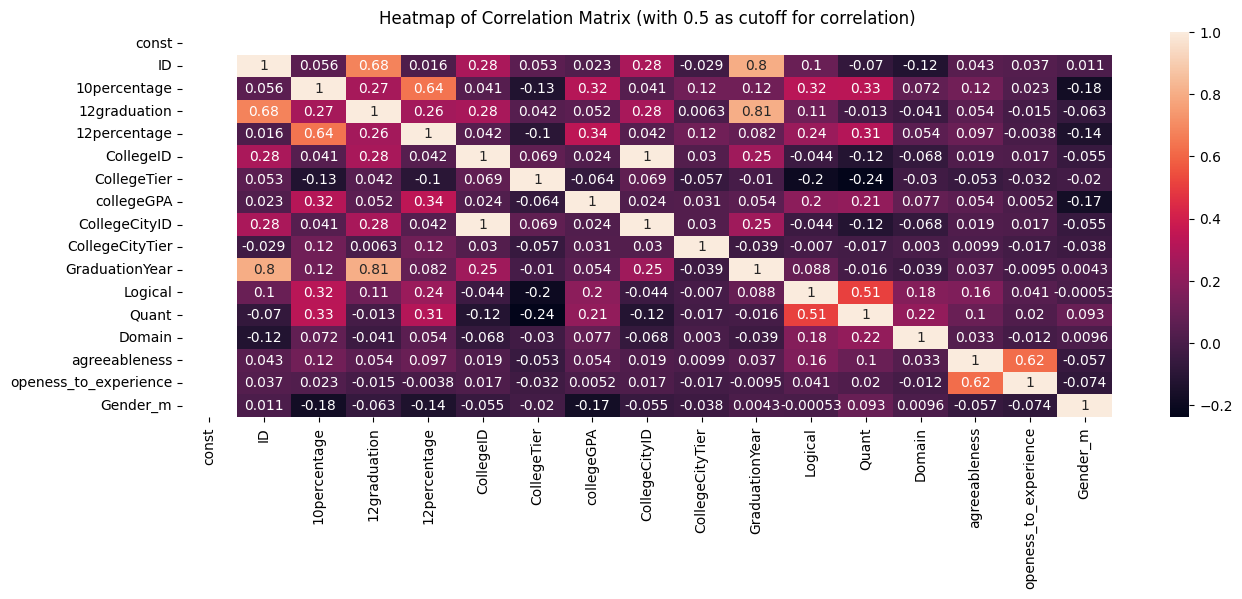

In [30]:
plt.figure(figsize=(15,5))
sns.heatmap(X_train.corr(), annot=True)
plt.title("Heatmap of Correlation Matrix (with 0.5 as cutoff for correlation)")

In [31]:
# v) Vairables to be removed based on correlation analysis

In [32]:
df.columns

Index(['ID', 'Gender', '10percentage', '12graduation', '12percentage',
       'CollegeID', 'CollegeTier', 'collegeGPA', 'CollegeCityID',
       'CollegeCityTier', 'GraduationYear', 'Logical', 'Quant', 'Domain',
       'agreeableness', 'openess_to_experience', 'Salary'],
      dtype='object')

In [33]:
# Dropping variables based on the correlation analysis cutoff of 0.5
X_train_new = X_train.drop(['ID','10percentage','GraduationYear','Quant','agreeableness'], axis=1)

In [34]:
# vi) Develop a linear regression model based on the variables


In [35]:
# Applying the Linear Regression 
lr = LinearRegression()
lr.fit(X_train_new,y_train)

LinearRegression()

In [36]:
for idx, col_name in enumerate(X_train_new.columns):
    print("The coefficient of Variable {} is {}".format(col_name,lr.coef_[idx]))

The coefficient of Variable const is 0.0
The coefficient of Variable 12graduation is -26240.540926081427
The coefficient of Variable 12percentage is 2823.9339032180446
The coefficient of Variable CollegeID is 2098058514358095.2
The coefficient of Variable CollegeTier is -102580.88851628997
The coefficient of Variable collegeGPA is 1716.8819573083597
The coefficient of Variable CollegeCityID is -2098058514358096.0
The coefficient of Variable CollegeCityTier is -10507.512484956607
The coefficient of Variable Logical is 282.79664779949604
The coefficient of Variable Domain is 34957.6198625859
The coefficient of Variable openess_to_experience is -3281.4823062864343
The coefficient of Variable Gender_m is 33638.554912384185


In [37]:
# 2c Apply Lasso regression and determine the significant variables – 10 marks

In [38]:
lasso = Lasso(alpha=0.05)
lasso.fit(X_train, y_train)
print("Lasso Coefficient:", lasso.coef_)

Lasso Coefficient: [ 0.00000000e+00 -9.83342029e-02  1.76928603e+03 -4.83182935e+03
  7.00194567e+02 -1.07316652e+00 -8.99724521e+04  1.65222800e+03
  2.66176983e-01 -1.23542035e+04 -8.96047776e+03  1.63410239e+02
  1.73495054e+02  2.06884492e+04  1.77204268e+04 -1.22723871e+04
  3.59536563e+04]


## Section C (20 marks)

**The data definition is as follows:** <br>

**Y**: Y =0 if bankruptcy after 2 years, 1 if solvent after 2 years

**X1**:  Retained Earnings/Total Assets

**X2**: Earnings before Interest and Taxes/Total Assets

**X3**: Sales / Total Assets

In [39]:
# i)  Read the data set and check for missing values  -3 marks

In [40]:
bank = pd.read_csv("./Dataset/Bankruptcy.csv")

In [41]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       66 non-null     int64  
 1   X1      66 non-null     float64
 2   X2      66 non-null     float64
 3   X3      66 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 2.2 KB


In [42]:
bank.isnull().sum()

Y     0
X1    0
X2    0
X3    0
dtype: int64

In [43]:
# ii) Split the data set into train and test – 4 marks


In [44]:
y = bank['Y']
X = bank.drop('Y', axis=1)

##### As there are 66 rows only in the current dataset, therefore we will split the train test with 50%:50%.
##### This ensures that both of the sets have min 30 rows to follow normal distributions.

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.5, random_state=2)

In [46]:
# iii) iii) Analyze the data set  based on the output,
# Use alpha = .05, to identify the significant variables, what do you conclude about the model

In [47]:
X_train = sm.add_constant(X_train)

lr_ols = sm.OLS(y_train, X_train).fit()
lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     17.35
Date:                Sat, 30 Nov 2024   Prob (F-statistic):           1.21e-06
Time:                        19:56:46   Log-Likelihood:                -6.8586
No. Observations:                  33   AIC:                             21.72
Df Residuals:                      29   BIC:                             27.70
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3422      0.104      3.280      0.003       0.129       0.556
X1             0.0041      0.001      3.571      0.001       0.002       0.006
X2             0.0029      0.002      1.765      0.088      -0.000       0.006
X3             0.1405      0.050      2.818      0.009       0.039       0.242
==============================================================================
Omnibus:                        7.113   Durbin-Watson:                   1.789
Prob(Omnibus):                  0.029   Jarque-Bera (JB):                2.819
Skew:                          -0.398   Prob(JB):                        0.244
Kurtosis:                       1.810   Cond. No.                         162.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Variables X1 and X3 are significant as they have p values < 0.05

In [48]:
# iv) Calculate the odd for each of the variable and interpret the meaning – 5 marks